In [25]:
import pandas as pd 
import re

<h1>Airports and Weather CSV</h1>
<h3>Questions we will answer with these datasets:</h3>
<ol>
    <li>What is the northernmost airport in the United States?</li>
    <li>What is the easternmost airport in the United States?</li>
    <li>On February 12th, 2013, which New York area airport had the windiest weather?</li>
</ol>
    

<h3>Let's load both csv files into dataframes and examine the first five rows and column names.</h3>

In [4]:
airports_df = pd.read_csv('../data-raw/airports.csv')
airports_df.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [5]:
weather_df = pd.read_csv('../data-raw/weather.csv')
weather_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


<h3>I believe I can use airports_df to answer the first two questions from our assignment.</h3>
<p>It has lat and long, and we should be able to sort based on those two columns to find what we want.</p>

In [12]:
airports_df.sort_values(by='lat', ascending=False)

,faa,name,lat,lon,alt,tz,dst,tzone
417,EEN,Dillant Hopkins Airport,72.270833,42.898333,149,-5,A,NaN
230,BRW,Wiley Post Will Rogers Mem,71.285446,-156.766003,44,-9,A,America/Anchorage
110,AIN,Wainwright Airport,70.638056,-159.994722,41,-9,A,America/Anchorage
708,K03,Wainwright As,70.613378,-159.860350,35,-9,A,America/Anchorage
152,ATK,Atqasuk Edward Burnell Sr Memorial Airport,70.467300,-157.436000,96,-9,A,America/Anchorage
...,...,...,...,...,...,...,...,...
930,MUE,Waimea Kohala,20.001328,-155.668108,2671,-10,A,Pacific/Honolulu
1403,WKL,Waikoloa Heliport,19.913600,-155.864000,109,-10,N,Pacific/Honolulu
231,BSF,Bradshaw Aaf,19.760056,-155.553717,6190,-10,A,Pacific/Honolulu
734,KOA,Kona Intl At Keahole,19.738767,-156.045631,47,-10,N,Pacific/Honolulu


<h3>The Northernmost airport in the United States is in Alaska</h3>
<p>The data is inaccurate for Dillant Hopkins Airport, United States is in the Western Hemisphere and the longitude should be negative.</p>
<p>Also, the latitude for Dillant Hopkins Airport is wrong as well.</p>

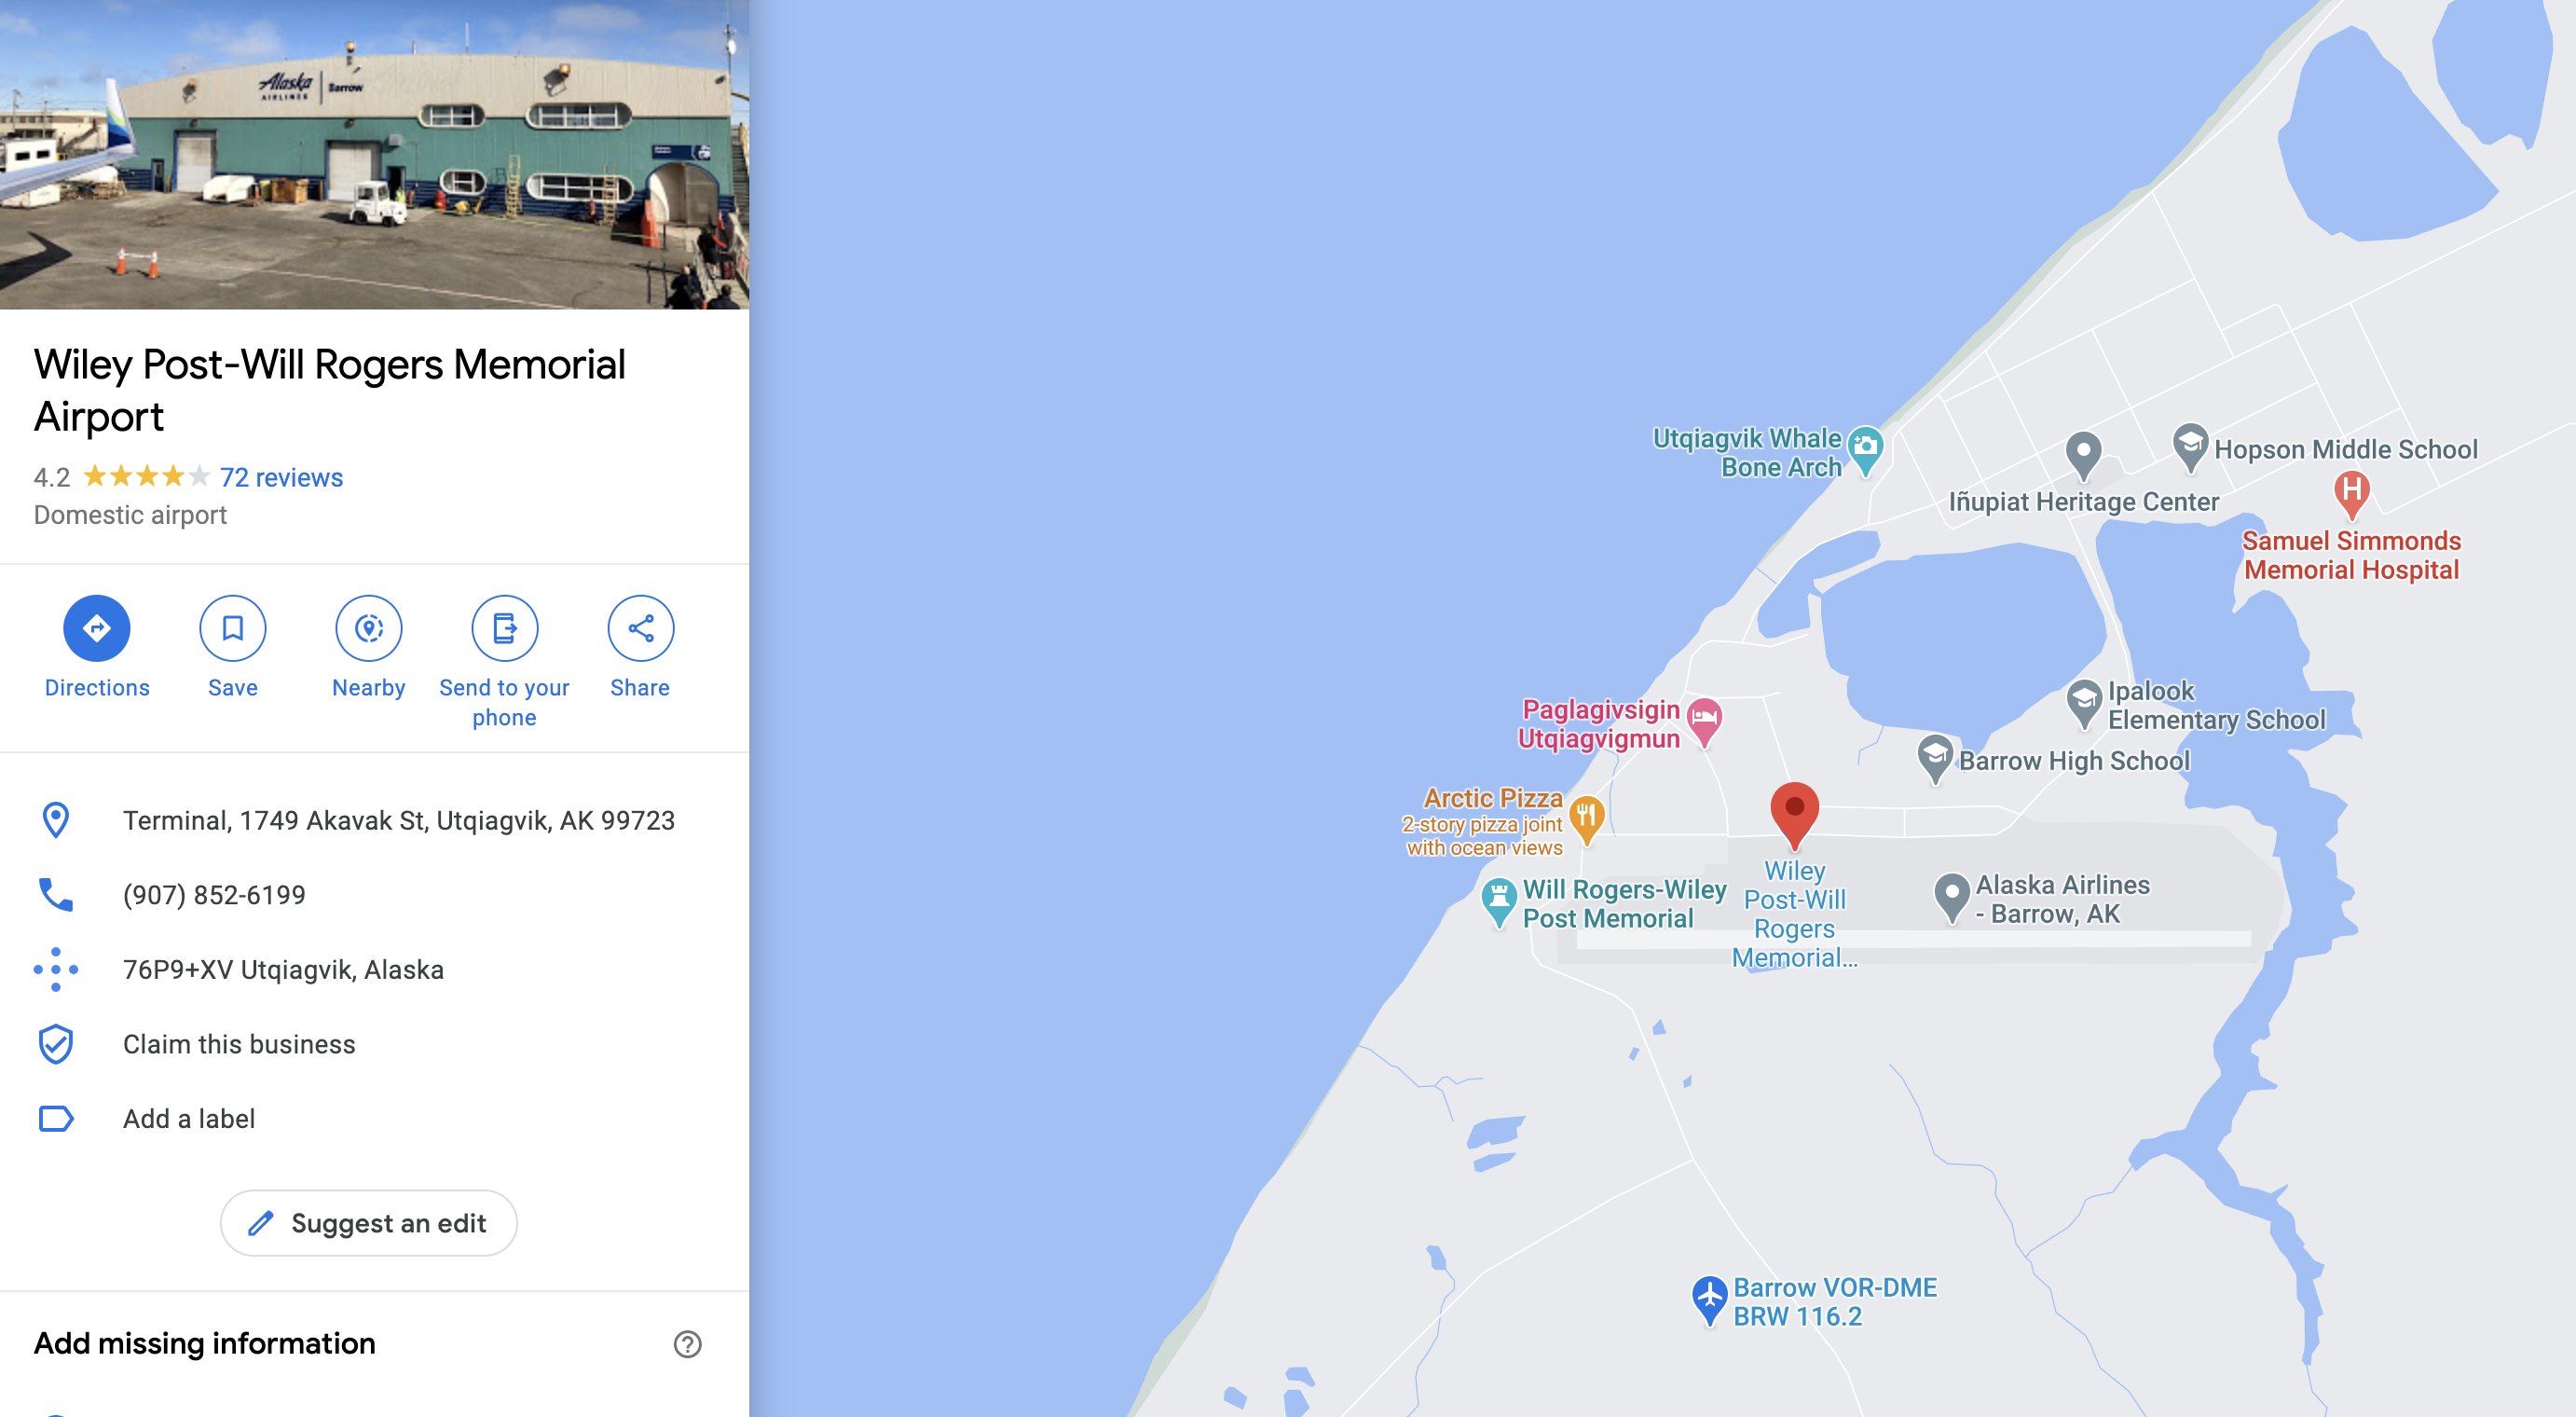

In [39]:
sorted_airports_df = airports_df.sort_values(by='lon', ascending=False)
sorted_airports_df

,faa,name,lat,lon,alt,tz,dst,tzone
1290,SYA,Eareckson As,52.712275,174.113620,98,-9,A,America/Anchorage
942,MYF,Montgomery Field,32.475900,117.759000,17,8,A,Asia/Chongqing
396,DVT,Deer Valley Municipal Airport,33.411700,112.457000,1478,8,A,Asia/Chongqing
417,EEN,Dillant Hopkins Airport,72.270833,42.898333,149,-5,A,NaN
444,EPM,Eastport Municipal Airport,44.910111,-67.012694,45,-5,A,America/New_York
...,...,...,...,...,...,...,...,...
1251,SNP,St Paul Island,57.167333,-170.220444,63,-9,A,America/Anchorage
1281,SVA,Savoonga Airport,63.686400,-170.493000,53,-9,A,America/Anchorage
522,GAM,Gambell Airport,63.766800,-171.733000,27,-9,A,America/Anchorage
112,AKB,Atka Airport,52.220278,-174.206389,56,-9,A,America/Anchorage
